# Creating a jeopardy categories database

In [1]:
import requests
import json
import matplotlib.pyplot as plt
import requests
import pandas as pd
from sqlalchemy import create_engine


In [2]:
url = "http://cluebase.lukelav.in/categories"

In [3]:
response = requests.get(url)
print(response.url)

http://cluebase.lukelav.in/categories


In [4]:
# Storing the JSON response within a variable
data = response.json()
# Use json.dumps to print the json
print(json.dumps(data, indent=4, sort_keys=True))

{
    "data": [
        {
            "category": "SCIENCE",
            "clue_count": 911
        },
        {
            "category": "LITERATURE",
            "clue_count": 812
        },
        {
            "category": "AMERICAN HISTORY",
            "clue_count": 778
        },
        {
            "category": "POTPOURRI",
            "clue_count": 744
        },
        {
            "category": "HISTORY",
            "clue_count": 723
        },
        {
            "category": "SPORTS",
            "clue_count": 693
        },
        {
            "category": "BEFORE & AFTER",
            "clue_count": 677
        },
        {
            "category": "WORLD HISTORY",
            "clue_count": 649
        },
        {
            "category": "WORD ORIGINS",
            "clue_count": 631
        },
        {
            "category": "WORLD GEOGRAPHY",
            "clue_count": 612
        },
        {
            "category": "TRANSPORTATION",
            "clue_count": 569
   

In [5]:
data.keys()

dict_keys(['status', 'data'])

In [6]:
#Parsing to make sure I'm going into the json file correctly
data['data'][0]

{'category': 'SCIENCE', 'clue_count': 911}

In [7]:
#Creating a dataframe out of the json file
df = pd.DataFrame(data['data'])

In [8]:
top_ten = df.head(10)
top_ten

,category,clue_count
0,SCIENCE,911
1,LITERATURE,812
2,AMERICAN HISTORY,778
3,POTPOURRI,744
4,HISTORY,723
5,SPORTS,693
6,BEFORE & AFTER,677
7,WORLD HISTORY,649
8,WORD ORIGINS,631
9,WORLD GEOGRAPHY,612


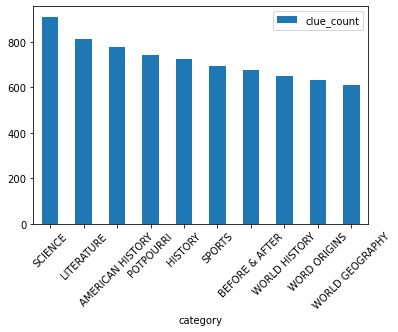

In [9]:
# Just playing around with the top ten categories here, nothing to pay attention to.
ax = top_ten.plot.bar(x='category', y='clue_count', rot=45)

In [12]:
connection_string = "postgres:postgres@localhost:5432/jeoparty"
engine = create_engine(f'postgresql://{connection_string}')

In [13]:
# Confirm tables
engine.table_names()

[]

In [14]:
df.to_sql(name='categories', con=engine, if_exists='append', index=True)